In [2]:
import requests
import pandas as pd

# data we got
url = "https://fakestoreapi.com/products"
response = requests.get(url)
data = response.json()

# we convert it the data frame
df = pd.DataFrame(data)

# columsn definition
df = df[['title', 'price', 'rating']]
df['rating_score'] = df['rating'].apply(lambda x: x['rate'])
df['rating_count'] = df['rating'].apply(lambda x: x['count'])

# Preview
df.head()


,title,price,rating,rating_score,rating_count
0,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,"{'rate': 3.9, 'count': 120}",3.9,120
1,Mens Casual Premium Slim Fit T-Shirts,22.30,"{'rate': 4.1, 'count': 259}",4.1,259
2,Mens Cotton Jacket,55.99,"{'rate': 4.7, 'count': 500}",4.7,500
3,Mens Casual Slim Fit,15.99,"{'rate': 2.1, 'count': 430}",2.1,430
4,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"{'rate': 4.6, 'count': 400}",4.6,400


In [3]:
print("Average Price:", df['price'].mean())
print("Highest Rated Product:", df.loc[df['rating_score'].idxmax(), 'title'])


Average Price: 162.04599999999996
Highest Rated Product: Silicon Power 256GB SSD 3D NAND A55 SLC Cache Performance Boost SATA III 2.5


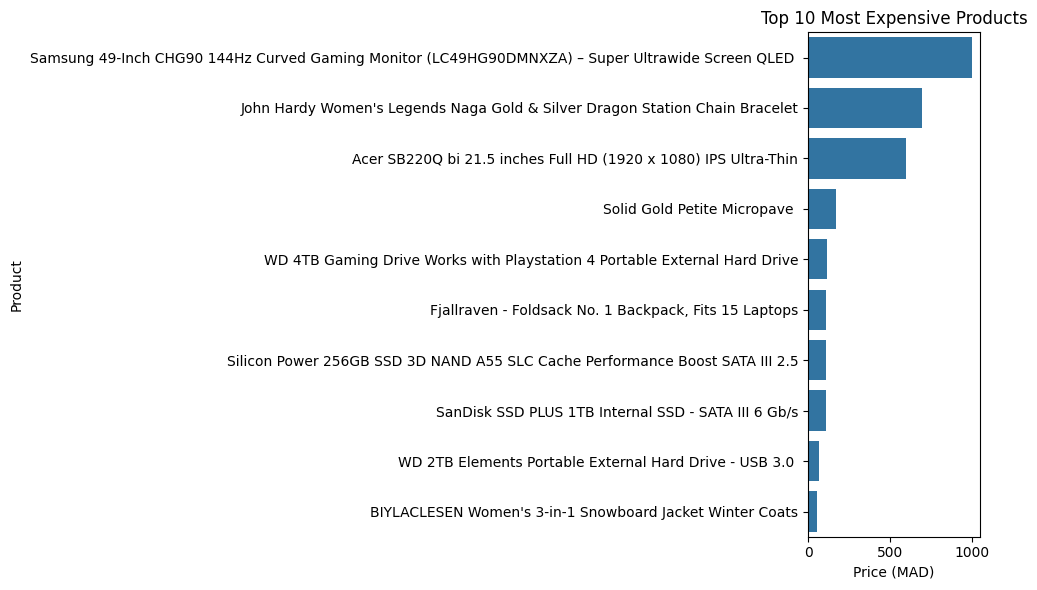

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=df.sort_values('price', ascending=False).head(10), x='price', y='title')
plt.title("Top 10 Most Expensive Products")
plt.xlabel("Price (MAD)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


In [11]:
print(" Average product price:", round(df['price'].mean(), 2), "MAD")
print("Max price:", df['price'].max(), "MAD")
print("Min price:", df['price'].min(), "MAD")

# Price Categories
df['price_category'] = pd.cut(df['price'], bins=[0, 50, 100, 150, 1000], labels=['Low', 'Medium', 'High', 'Premium'])
price_group = df.groupby('price_category').size()

# Top-rated
top_rated = df.sort_values('rating_score', ascending=False).head(3)[['title', 'price', 'rating_score']]
top_rated


 Average product price: 162.05 MAD
Max price: 999.99 MAD
Min price: 7.95 MAD


/tmp/ipython-input-11-514727766.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_group = df.groupby('price_category').size()


,title,price,rating_score
11,WD 4TB Gaming Drive Works with Playstation 4 P...,114.00,4.8
10,Silicon Power 256GB SSD 3D NAND A55 SLC Cache ...,109.00,4.8
2,Mens Cotton Jacket,55.99,4.7


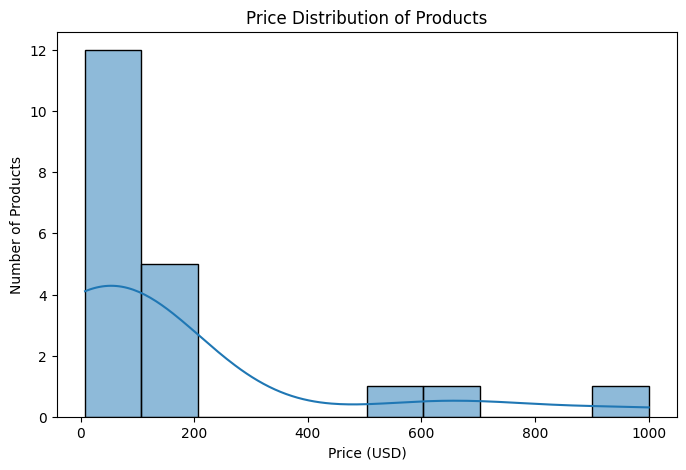

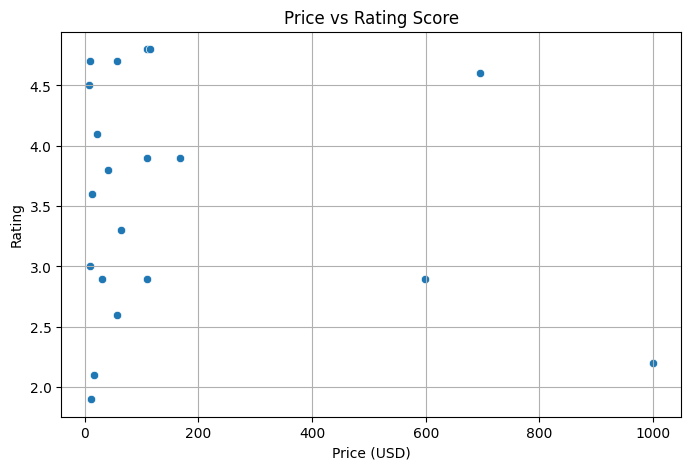

In [6]:
# Price distribution plots
plt.figure(figsize=(8, 5))
sns.histplot(df['price'], kde=True, bins=10)
plt.title('Price Distribution of Products')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Products')
plt.show()

# Price vs Rating plots
plt.figure(figsize=(8, 5))
sns.scatterplot(x='price', y='rating_score', data=df)
plt.title('Price vs Rating Score')
plt.xlabel('Price (USD)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


In [7]:
def get_data(api_url):
    res = requests.get(api_url)
    return pd.DataFrame(res.json())

def clean_rating_columns(df):
    df['rating_score'] = df['rating'].apply(lambda x: x['rate'])
    df['rating_count'] = df['rating'].apply(lambda x: x['count'])
    return df


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

#let's prepare the data we'll usee
df['price_category'] = pd.cut(df['price'], bins=[0, 50, 100, 150, 1000], labels=[0, 1, 2, 3])

#the features
features = df[['rating_score', 'rating_count']]
target = df['price_category']

# Trainingtest split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# these are the predictions
y_pred = model.predict(X_test)

# finally the evakuation
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.10      0.17      0.12         6
weighted avg       0.20      0.33      0.25         6



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
